# Heart Disease Prediction 
Steps:
* Problem Defination
* Data
* Evalution
* Features
* Modeling
* Experiment

### 1- Problem Defination
> Based on given data we have to predict whether the patient has heart disease or not.
### 2- Data
> So now we get the data from Kaggle
### 3- Evalute
> In our inital stages, we have to make sure that the accuracy of maodel is 95%.
### 4- Features
> The attributes of this dataset are: age, gender, heart rate, systolic blood pressure, diastolic blood pressure, blood sugar, ck-mb and troponin with negative or positive output.

The dataset has 9 column:
* Age: The patient's age
* Gender: Biological sex of the patient (The male is set to 1 and the female to 0)
* Heart Rate: The number of heartbeats per minute
* Systolic Blood Pressure: The pressure in arteries when the heart contracts
* Diastolic Blood Pressure: The pressure in arteries between heartbeats
* Blood Sugar: The patient's blood glucose level
* Ck-mb: A cardiac enzyme released during heart muscle damage
* Troponin:A highly specific protein biomarker for heart muscle injury
* Result: The outcome label indicating whether or not the patient experienced a heart attack (1 for positive and 0 for negative)

### Modeling

In [ ]:
!pip install seaborn

In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pyp
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve  

## Analysising Data:
* Which is our problem?
* What kind we have?
* Is there any missing values in my data?
* Are there any Outliers?
* Can we add or remove some features?

In [10]:
# Load data
data = pd.read_csv("Medicaldataset.csv")
data.shape

(1319, 9)

In [11]:
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [12]:
data['Result'].value_counts()

Result
1    810
0    509
Name: count, dtype: int64

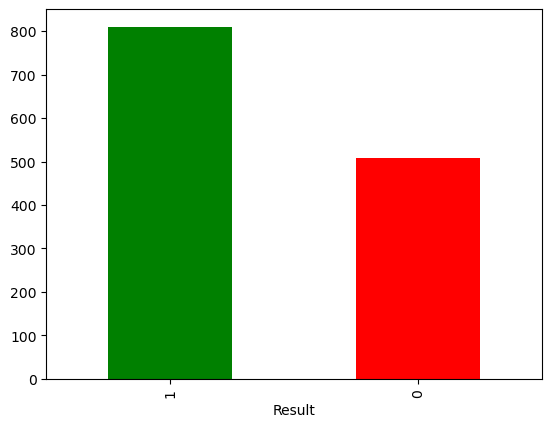

In [13]:
data['Result'].value_counts().plot(kind = 'bar', color = ['green', 'red']);

In [14]:
data.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [15]:
data['Gender'].value_counts()

Gender
1    870
0    449
Name: count, dtype: int64

In [16]:
# Checking the heart attack rate gender wise
pd.crosstab(data.Gender, data.Result)

Result,0,1
Gender,,
0,202,247
1,307,563


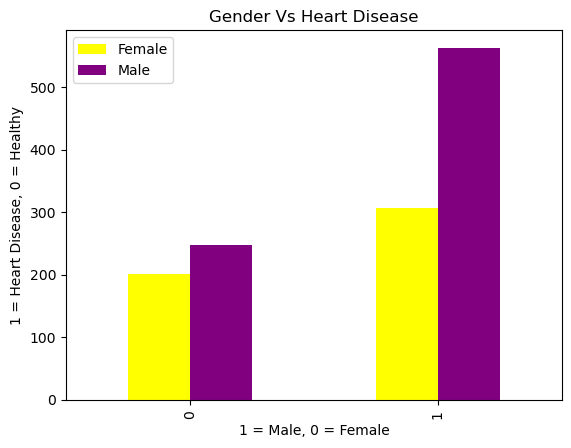

In [17]:
pd.crosstab(data.Gender, data.Result).plot(kind='bar', color=['yellow', 'purple'])
pyp.title('Gender Vs Heart Disease')
pyp.ylabel('1 = Heart Disease, 0 = Healthy')
pyp.xlabel('1 = Male, 0 = Female')
pyp.legend(['Female', 'Male']);

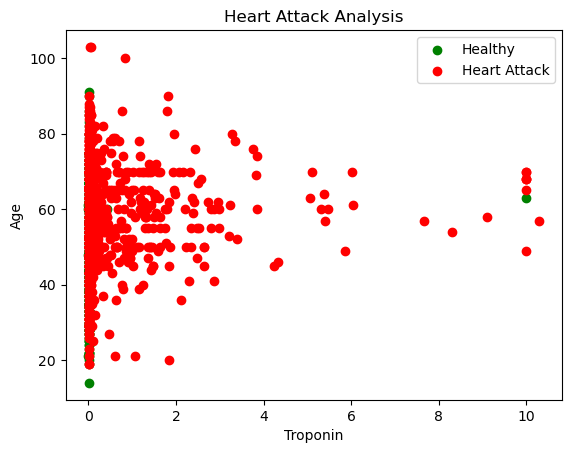

In [18]:
# Now checking the heart attack postive result by their heart rate and age
pyp.scatter( data.Troponin[data.Result == 0], data.Age[data.Result == 0], c = 'green');
pyp.scatter( data.Troponin[data.Result == 1], data.Age[data.Result == 1], c = 'red');
pyp.title('Heart Attack Analysis')
pyp.xlabel('Troponin')
pyp.ylabel('Age')
pyp.legend(['Healthy', 'Heart Attack']);

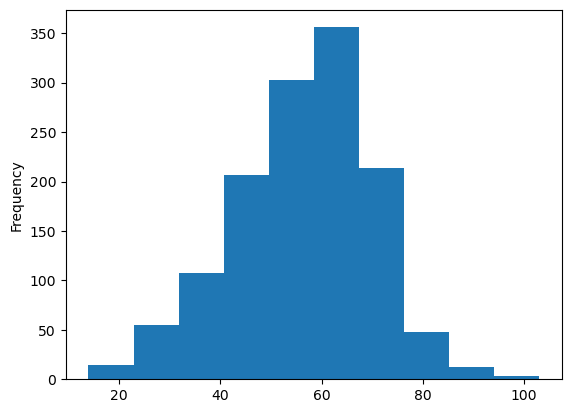

In [19]:
# Age 
data.Age.plot.hist();

In [20]:
data['CK-MB'].value_counts()

CK-MB
300.000    19
1.600      11
2.110       9
1.330       9
1.830       9
           ..
0.657       1
3.420       1
3.490       1
5.730       1
4.010       1
Name: count, Length: 700, dtype: int64

In [21]:
data.corr()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
Age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800,0.238097
Gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
Heart rate,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
Systolic blood pressure,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
Diastolic blood pressure,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
Blood sugar,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059
CK-MB,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
Troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
Result,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000


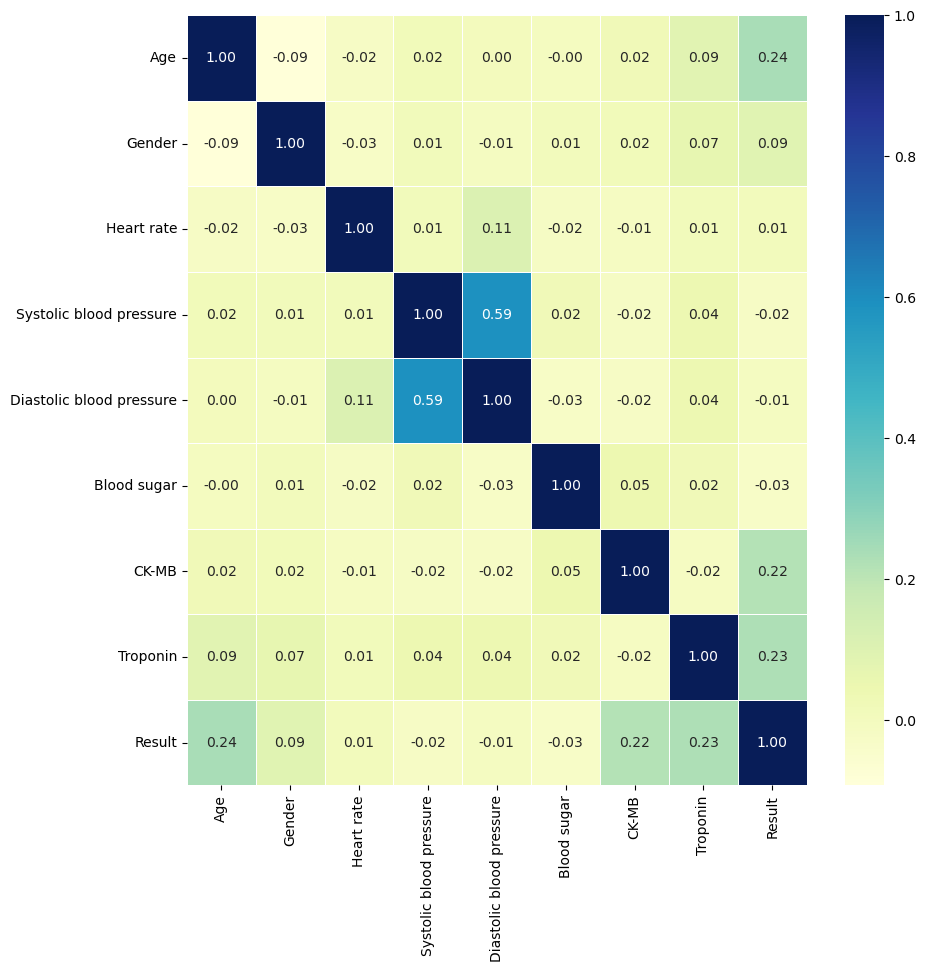

In [22]:
# Drawing corelation map:
cor_map = data.corr()
home, room = pyp.subplots(figsize = (10, 10))
room = sns.heatmap(cor_map, annot = True, linewidth = 0.5, fmt = '0.2f', cmap = 'YlGnBu' )

## Modeling of Data

In [23]:
# spliting the data
x = data.drop('Result', axis = 1)
y = data['Result']

In [24]:
np.random.seed(7)
# train the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Selecting Model
We are going to test these 3 models:
* K- Nearest Neighbor Classifier
* Random Forest Classifier
* Logistic Regression

In [25]:
# Dictionary for models
testing_models = {
    'KNN': KNeighborsClassifier(),
    'RF': RandomForestClassifier(),
    'LR': LogisticRegression()
}

def fit_and_score(testing_models, x_train, x_test, y_train, y_test):
    np.random.seed(7)
    # Dictionary for score of models
    testing_models_score = {}

    for name, model in testing_models.items():
        model.fit(x_train, y_train)
        testing_models_score[name] = model.score(x_test, y_test)
        
    return testing_models_score
    
    

In [26]:
# calling the function:
model_score = fit_and_score(testing_models, x_train, x_test, y_train, y_test)
model_score

E:\Courses\Machine Learning Course Resourses\ML Projects\cardio_project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6212121212121212, 'RF': 0.9810606060606061, 'LR': 0.8371212121212122}

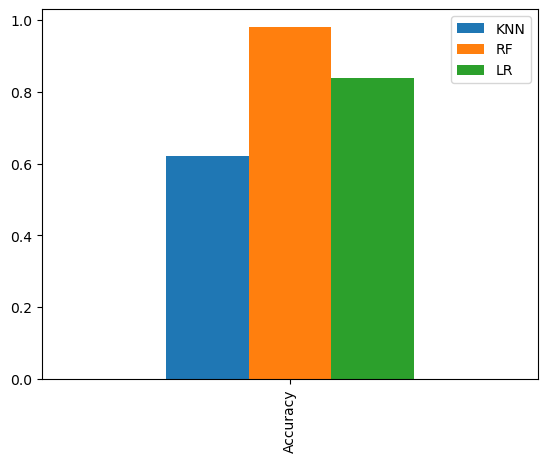

In [27]:
model_comparision = pd.DataFrame(model_score, index= ['Accuracy'])
model_comparision.plot.bar();

In [28]:
## According to the result, I got 98% accuracy in RandomForestClassifier while the target is 95%.
## so my result is achieve.

## Tunning the Model

In [29]:
train_score = []
test_score = []

# Tunning K Neighbors
n_neighbors_range = range(1, 30)
KNN = KNeighborsClassifier()

for i in n_neighbors_range:
    KNN.set_params(n_neighbors = i)
    KNN.fit(x_train, y_train)
    train_score.append(KNN.score(x_train, y_train))
    test_score.append(KNN.score(x_test, y_test))


In [30]:
train_score

[1.0,
 0.8018957345971564,
 0.8028436018957346,
 0.7450236966824645,
 0.7497630331753554,
 0.7270142180094786,
 0.7270142180094786,
 0.7099526066350711,
 0.7165876777251184,
 0.7071090047393365,
 0.7118483412322275,
 0.7109004739336493,
 0.7137440758293839,
 0.704265402843602,
 0.7071090047393365,
 0.6995260663507109,
 0.7061611374407583,
 0.7090047393364929,
 0.7023696682464455,
 0.704265402843602,
 0.7004739336492891,
 0.6947867298578199,
 0.6957345971563981,
 0.7014218009478673,
 0.7004739336492891,
 0.6985781990521327,
 0.6966824644549763,
 0.6890995260663507,
 0.6928909952606636]

In [31]:
test_score

[0.553030303030303,
 0.5189393939393939,
 0.553030303030303,
 0.5681818181818182,
 0.6212121212121212,
 0.5795454545454546,
 0.5946969696969697,
 0.6022727272727273,
 0.6174242424242424,
 0.6022727272727273,
 0.6098484848484849,
 0.6174242424242424,
 0.6401515151515151,
 0.6325757575757576,
 0.6287878787878788,
 0.6325757575757576,
 0.6287878787878788,
 0.6174242424242424,
 0.6022727272727273,
 0.625,
 0.6287878787878788,
 0.625,
 0.6325757575757576,
 0.6325757575757576,
 0.6477272727272727,
 0.6136363636363636,
 0.6477272727272727,
 0.6477272727272727,
 0.6515151515151515]

Max KNNN: <built-in function max>


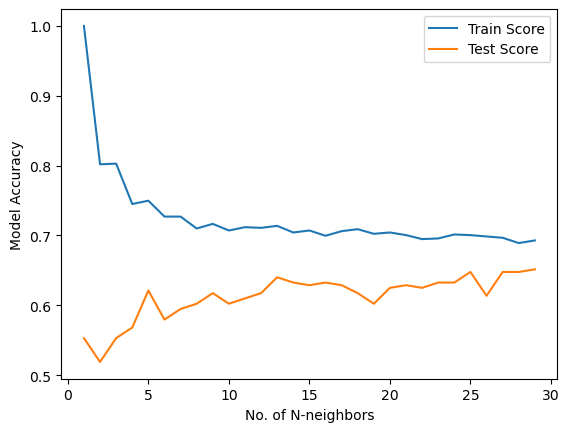

In [32]:
# ploting the result
pyp.plot(n_neighbors_range, train_score, label ='Train Score')
pyp.plot(n_neighbors_range, test_score, label ='Test Score')
pyp.xlabel('No. of N-neighbors')
pyp.ylabel('Model Accuracy')
pyp.legend();
print(f'Max KNNN: {max}')

In [33]:
# Tunning Logistic Regression
LR_hyper_parameters = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}

In [34]:
np.random.seed(7)

lr = RandomizedSearchCV(LogisticRegression(), param_distributions = LR_hyper_parameters, cv=5, n_iter = 20, verbose = True )

lr.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [35]:
np.random.seed(7)

lr = GridSearchCV(LogisticRegression(), param_grid = LR_hyper_parameters, cv=5, verbose = True )

lr.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [36]:
lr.score(x_test, y_test)

0.8371212121212122

In [37]:
# Tunning Random Forest Classifier
RF_hyper_parameters = {
    'n_estimators': np.arange(10, 1600, 100),
    'max_depth': [None, 3, 5, 6, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
}

In [38]:
np.random.seed(7)

rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = RF_hyper_parameters, cv=5, n_iter = 20, verbose = True )

rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ..., 1410, 1510])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [39]:
rf.score(x_test, y_test)

0.9810606060606061

In [40]:
rf.best_params_

{'n_estimators': np.int64(1510),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(19),
 'max_depth': 5}

In [41]:
# np.random.seed(7)

# RF_best_params = {
#     'n_estimators': np.arange(1500, 1600, 10),
#     'min_samples_split': [10,12],
#     'min_samples_leaf': np.arange(15, 20, 1),
#     'max_depth':  np.arange(3, 6, 1),}

# rf = GridSearchCV(RandomForestClassifier(), param_grid = RF_best_params, cv=5, verbose = True )

# rf.fit(x_train, y_train)

In [42]:
rf.score(x_test, y_test)

0.9810606060606061

In [43]:
# Area Under Curve
y_predict = lr.predict(x_test)

In [46]:
plot_roc_curve(lr, x_test, y_test)

NameError: name 'plot_roc_curve' is not defined

In [47]:
# confusion martix
print(confusion_matrix(y_test, y_predict))

[[ 85  18]
 [ 25 136]]


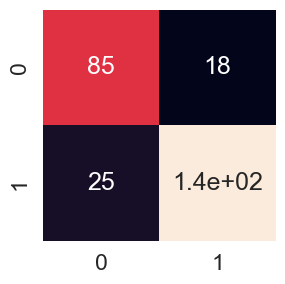

In [48]:
sns.set(font_scale = 1.5)

def plot_confusion(y_test, y_predict):
    fig, ax = pyp.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_predict), annot = True, cbar = False)

plot_confusion(y_test, y_predict)
    

In [49]:
# Classification Report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       103
           1       0.88      0.84      0.86       161

    accuracy                           0.84       264
   macro avg       0.83      0.83      0.83       264
weighted avg       0.84      0.84      0.84       264



In [50]:
lr.best_params_

{'C': np.float64(3792.690190732246), 'solver': 'liblinear'}

In [58]:
lr = LogisticRegression(C=3792.690190732246 , solver = 'liblinear')

In [59]:
# Cross validation accuracy
cv_accuracy = cross_val_score(lr, x, y, cv = 7, scoring = 'accuracy')
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

np.float64(0.8278413020054358)

In [60]:
cv_precision = cross_val_score(lr, x, y, cv = 7, scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8799319505273564)

In [61]:
cv_recall = cross_val_score(lr, x, y, cv = 7, scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.8357892482330262)

In [62]:
cv_f1 = cross_val_score(lr, x, y, cv = 7, scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8564529148348686)

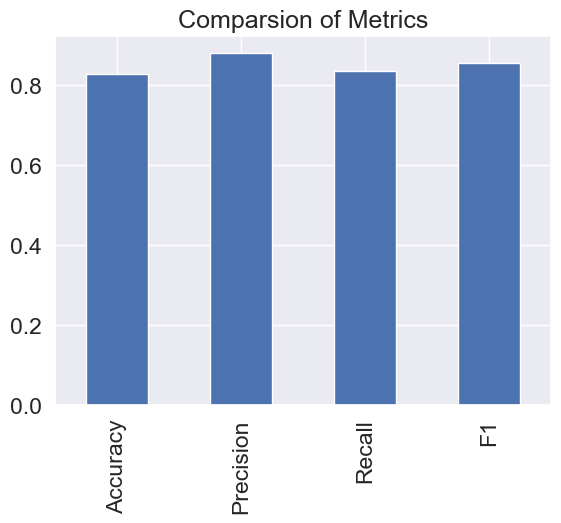

In [63]:
# Visualization Cross Validation Results:
cv_plot = pd.DataFrame({
    'Accuracy': cv_accuracy,
    'Precision': cv_precision ,
    'Recall': cv_recall ,
    'F1': cv_f1 ,
    
}, index = [0])

cv_plot.T.plot.bar(title = 'Comparsion of Metrics', legend = False);

In [65]:
# Feature Improvement:
lr.fit(x_train, y_train)
lr.coef_

array([[ 4.85953136e-02,  3.61622892e-01,  5.02956967e-04,
        -3.09658656e-03,  3.89302381e-03, -1.11074279e-03,
         3.30790999e-01,  4.26650300e+00]])

In [69]:
coef = dict(zip(data.columns, list(lr.coef_[0])))

coef

{'Age': np.float64(0.04859531358329249),
 'Gender': np.float64(0.3616228923691127),
 'Heart rate': np.float64(0.0005029569673828555),
 'Systolic blood pressure': np.float64(-0.003096586564980388),
 'Diastolic blood pressure': np.float64(0.00389302381471061),
 'Blood sugar': np.float64(-0.0011107427910332871),
 'CK-MB': np.float64(0.33079099907259546),
 'Troponin': np.float64(4.266502996334309)}

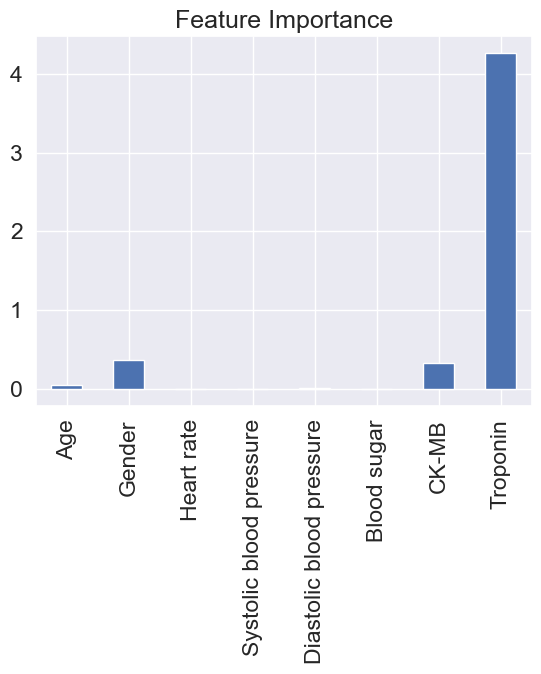

In [71]:
coef_plot = pd.DataFrame(coef, index = [0])
coef_plot.T.plot.bar(title = 'Feature Importance', legend = False);

# Conlusion: